           method                             url  machine  http-code  處理時間(ms)
時間                                                                             
2023-12-12   POST     /api/UserNotifyLog/QueryNew  {WEB_1}      200.0       9.0
2023-12-12   POST  /api/UserNotifyLog/QueryTop100  {WEB_1}      200.0      11.0
2023-12-12    GET   /api/Form/GetReservationCount  {WEB_1}      200.0      10.0
2023-12-12   POST     /api/UserNotifyLog/QueryNew  {WEB_1}      200.0       7.0
2023-12-12    GET   /api/Form/GetReservationCount  {WEB_1}      200.0      11.0


<Figure size 432x288 with 0 Axes>

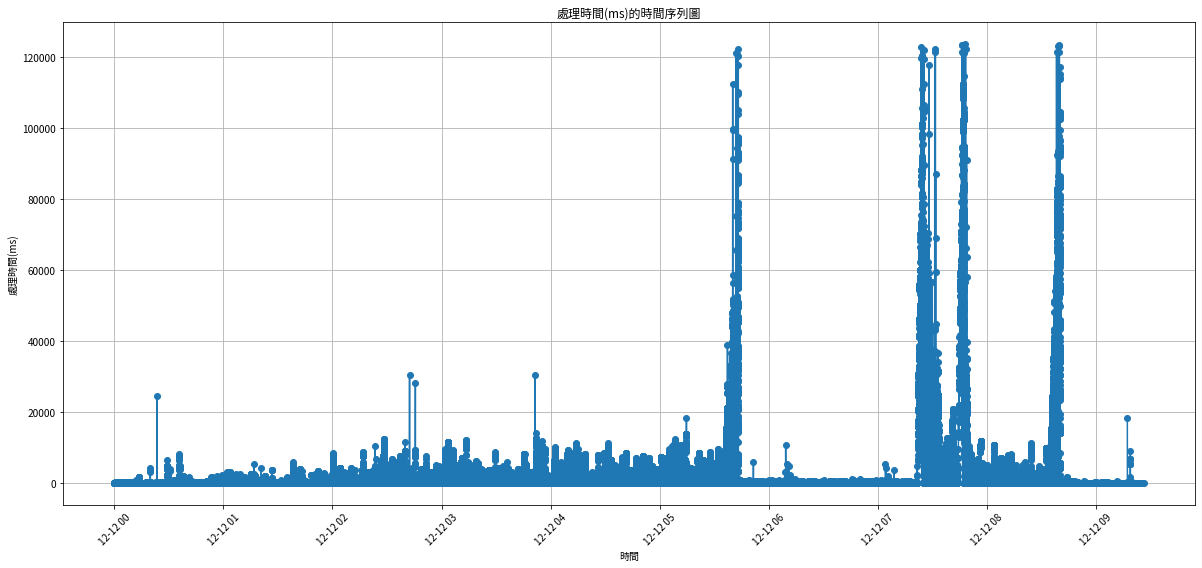

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 500)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.width', 180)   

# 讀取日誌文件
file_path = 'LogFiles/u_ex231212.log'

# 嘗試調整參數以解析日誌文件
try:
  df = pd.read_csv(file_path, sep=' ', header=None , skiprows=4, on_bad_lines='skip')
except pd.errors.ParserError as e:
  print("Parsing Error:", e)

df["dt"] = df[0] + " " + df[1]
df['時間'] = pd.to_datetime(df["dt"], format='%Y-%m-%d %H:%M:%S', errors='coerce')

df = df.drop(df.columns[[0, 1,2,5,6,7,9,10,12,13,15]], axis=1)
df.set_index('時間', inplace=True)
df.columns = ["method","url","machine","http-code","處理時間(ms)"]
print(df.head(5))

# 繪製時間序列圖
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta', 'Arial', 'DejaVu Sans']  # 可以替換成其他支持的字型名稱
font_properties = plt.rcParams['font.sans-serif']
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# 取得目前顯示器的寬度，或者指定一個你想要的寬度值（單位：英寸）
screen_width_inches = plt.gcf().get_figwidth() * 2.8
plt.figure(figsize=(screen_width_inches, 8))
plt.plot(df.index, df['處理時間(ms)'], marker='o', linestyle='-')
plt.title('處理時間(ms)的時間序列圖')
plt.xlabel('時間')
plt.ylabel('處理時間(ms)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()